In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from matplotlib import cm
cmap = plt.cm.get_cmap('viridis_r')
#cmap = matplotlib.colormaps.get_cmap('viridis_r')

# Ignore warning
import warnings
import logging

logging.getLogger('matplotlib').setLevel(logging.ERROR)
warnings.filterwarnings("ignore",category=matplotlib.MatplotlibDeprecationWarning)

# Get plot params

from plot_params import params
pylab.rcParams.update(params)

# Set default colors to load at will
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

%matplotlib inline

In [7]:
import torch
import corner
import numpy as np
import matplotlib.pyplot as plt

# Define levels and labels
levels = 1.0 - np.exp(-0.5 * np.array([1.0, 2.0]) ** 2)
labels1 = [
    r"$b_1$",
    r"$b_2$",
    r"$b_3$",
    r"$b_{\mathcal{G}_2}$",
    r"$b_{\Gamma_3}$",
    r"$b_{\nabla^2\delta}$",
    r"$\alpha_{0}$",
    r"$\alpha_1$",
]

# Load the model
p_beta_hod = torch.load("../data/models/p_beta_hod.pt")

# Define axis limits
axis_limits = [
    (1.6, 3.6),
    (-1, 3.2),
    (-2, 4),
    (-2.1, 0),
    (0, 4.5),
    (0., 1.8),
    (-0.2, 0.2),
    (-0.05, 0.5),
]

# Generate samples for different HOD parameters
hod_params = torch.Tensor([
    [12.41, 1.3666e01, -0.5054e00, 1.3452e00, 0.0312, -0.4359, -0.2179],
    [12.55, 1.3666e01, -0.5054e00, 1.3452e00, 0.0312, -0.4359, -0.2179],
    [12.7, 1.3666e01, -0.5054e00, 1.3452e00, 0.0312, -0.4359, -0.2179],
    [12.85, 1.3666e01, -0.5054e00, 1.3452e00, 0.0312, -0.4359, -0.2179],
    [13.00, 1.3666e01, -0.5054e00, 1.3452e00, 0.0312, -0.4359, -0.2179],
    [13.15, 1.3666e01, -0.5054e00, 1.3452e00, 0.0312, -0.4359, -0.2179],
    [13.29, 1.3666e01, -0.5054e00, 1.3452e00, 0.0312, -0.4359, -0.2179]
])



# Corner plot configuration
corner_configs = {
    "smooth": 1.2,
    "smooth1d": 1.2,
    "bins": 125,
    "levels": levels,
    "plot_datapoints": False,
    "plot_density": False,
    "labels": labels1,
    "range": axis_limits,
}

# Use a colormap for colors
cmap = plt.cm.RdBu_r
num_samples = len(hod_params)
colors = [cmap(i / (num_samples - 1)) for i in range(num_samples)]

# Initialize fig to None
fig = None

lw = 1.5

# Generate and plot samples for different HOD parameters
for i, hod in enumerate(hod_params):
    beta_samples = p_beta_hod.sample(context=hod[None, ...], num_samples=20000).detach().numpy()
    # Ensure correct usage of the color parameter
    fig = corner.corner(
        beta_samples[0],  # Ensure beta_samples is correctly indexed if needed
        **corner_configs,
        fig=fig,
        hist_kwargs={"lw": lw, "color": colors[i]},  # And here if applicable
        contour_kwargs={"linewidths": lw, "colors": 2 * [colors[i]]},
    )

num_params = len(labels1)

# Increase the ylim of the 1D histograms (axes along the diagonal) by a factor of 1.5
axes = np.array(fig.axes).reshape((num_params, num_params))
for i in range(num_params):
    axes[i, i].set_ylim(axes[i, i].get_ylim()[0], axes[i, i].get_ylim()[1] * 1.8)

# Custom legend for HOD parameters
legend_labels = [f"${hod[0]:.2f}$" for hod in hod_params]
legend_handles = [plt.Line2D([], [], color=color, linestyle='-', label=label) for color, label in zip(colors, legend_labels)]

# Position legend
plt.legend(title=r"$\log (M_{{\rm cut}}\,[h^{-1}\mathrm M_\odot])$", handles=legend_handles, loc="upper right", bbox_to_anchor=(1, 6), fontsize=18, title_fontsize=20)

plt.savefig("figures/conditional.pdf")

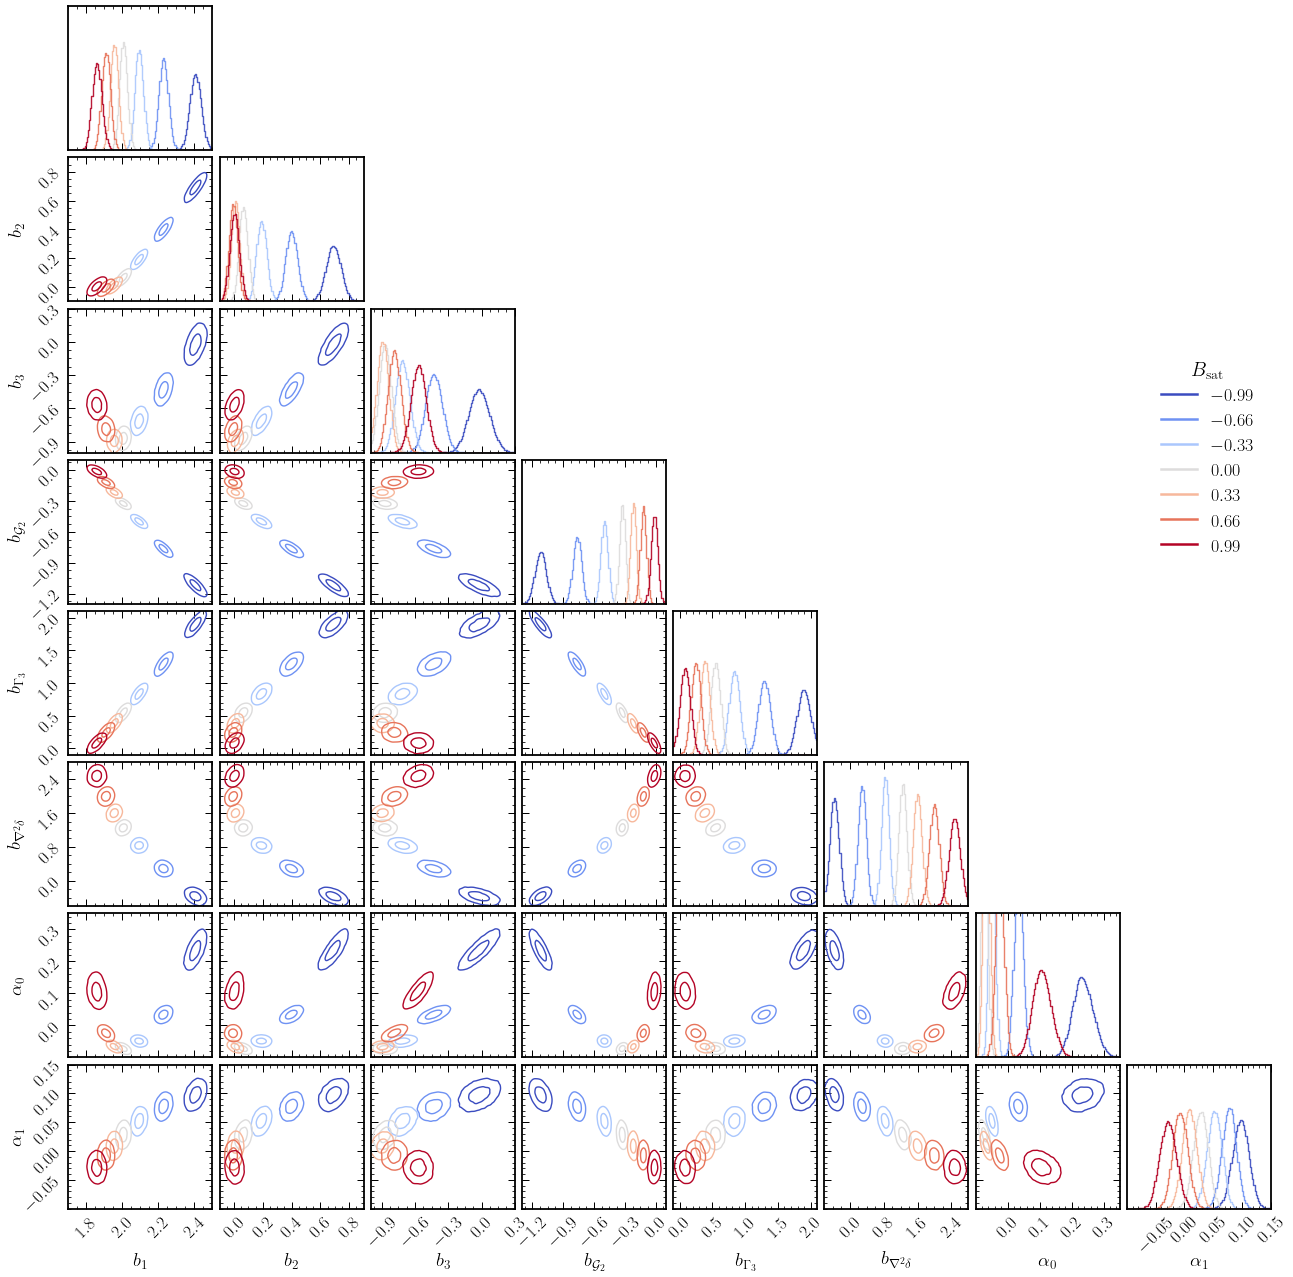

In [ ]:
import torch
import corner
import numpy as np
import matplotlib.pyplot as plt

# Define labels
labels1 = [
    r"$b_1$",
    r"$b_2$",
    r"$b_3$",
    r"$b_{\mathcal{G}_2}$",
    r"$b_{\Gamma_3}$",
    r"$b_{\nabla^2\delta}$",
    r"$\alpha_{0}$",
    r"$\alpha_1$",
]

# Define levels for corner plots
levels = 1.0 - np.exp(-0.5 * np.array([1.0, 2.0]) ** 2)

# Load the model
p_beta_hod = torch.load("../data/models/p_beta_hod.pt")

axis_limits = [(1.7, 2.5), (-0.1, 0.9), (-1, 0.3), (-1.3, 0.1), (-0.1, 2.1), (-0.6, 2.8), (-0.1, 0.35), (-0.1, 0.15)]

# Define HOD parameters
hod_params = torch.Tensor([
    [12.66, 1.3666e01, -0.5054e00, 1.3452e00, 0.0312, -0.4359, -0.99],
    [12.66, 1.3666e01, -0.5054e00, 1.3452e00, 0.0312, -0.4359, -0.66],
    [12.66, 1.3666e01, -0.5054e00, 1.3452e00, 0.0312, -0.4359, -0.33],
    [12.66, 1.3666e01, -0.5054e00, 1.3452e00, 0.0312, -0.4359, 0.0],
    [12.66, 1.3666e01, -0.5054e00, 1.3452e00, 0.0312, -0.4359, 0.33],
    [12.66, 1.3666e01, -0.5054e00, 1.3452e00, 0.0312, -0.4359, 0.66],
    [12.66, 1.3666e01, -0.5054e00, 1.3452e00, 0.0312, -0.4359, 0.99],
])

# Corner plot configuration
corner_configs = {
    "smooth": 1.2,
    "smooth1d": 1.2,
    "bins": 125,
    "levels": levels,
    "plot_datapoints": False,
    "plot_density": False,
    "labels": labels1,
    "range": axis_limits,
}

# Use a colormap for colors
cmap = plt.cm.RdBu_r
num_samples = len(hod_params)
colors = [cmap(i / (num_samples - 1)) for i in range(num_samples)]

# Initialize fig to None
fig = None

lw = 1.5

# Generate and plot samples for different HOD parameters
for i, hod in enumerate(hod_params):
    beta_samples = p_beta_hod.sample(context=hod[None, ...], num_samples=20000).detach().numpy()
    # Ensure correct usage of the color parameter
    fig = corner.corner(
        beta_samples[0],  # Ensure beta_samples is correctly indexed if needed
        **corner_configs,
        fig=fig,
        hist_kwargs={"lw": lw, "color": colors[i]},  # And here if applicable
        contour_kwargs={"linewidths": lw, "colors": 2 * [colors[i]]},
    )

num_params = len(labels1)

# Increase the ylim of the 1D histograms (axes along the diagonal) by a factor of 1.5
axes = np.array(fig.axes).reshape((num_params, num_params))
for i in range(num_params):
    axes[i, i].set_ylim(axes[i, i].get_ylim()[0], axes[i, i].get_ylim()[1] * 1.5)

# Custom legend for HOD parameters
legend_labels = [f"${hod[-1]:.2f}$" for hod in hod_params]
legend_handles = [plt.Line2D([], [], color=color, linestyle='-', label=label) for color, label in zip(colors, legend_labels)]

# Position legend
plt.legend(title=r"$B_{\rm sat}$", handles=legend_handles, loc="upper right", bbox_to_anchor=(1, 6), fontsize=18, title_fontsize=20)

plt.savefig("figures/conditional_assembly.pdf")
